# **(AST 210) Proyecto 1 II Semestre 2024** : Código sobre el estudio de estabilidad de  los Puntos Lagragianos L4 y L5 usando el código numérico *REBOUND*

Integrantes: Miyaray Arenas e Iñaki Bermeo



*   En este código, se estudiará la estabilidad de los puntos lagrangianos L4 y L5 para un sistema que aborda el problema de tres cuerpos en su forma "reducida". Por lo tanto, se llevará a cabo una simulación principal mediante *REBOUND*, la cuál incluirá a Júpiter, el Sol y una partícula de masa muy pequeña, ubicada ya sea en L4 o L5 (dependiendo de la selección del usuario). Cabe destacar que se asumió que los dos cuerpos en órbita describirán una **órbita circular** (excentricidad nula) y ambos comenzarán a una **distancia radial de 5.2** (AU).

*   Luego, se realizará un análisis de las características más relevantes a destacar del sistema mediante diferentes gráficos. Por ejemplo, el estudio del potencial efectivo de los objetos en función de la distancia radial que tengan, a medida que evolucione el sistema en el tiempo, entre otros.




## **Visualización gráfica de las trayectorias para L4/L5 y Júpiter (INSTANTE)**

*   En esta parte del Notebook, se llevará a cabo la simulación principal del código. Dónde el usuario debe seleccionar sí desea observar a la partícula pequeña en el punto L4 o L5 y el tiempo en que quiere ver evolucionado el sistema. Para después, poder apreciar esta en un gráfico X vs Y en coordenadas polares justo en el **instante en que finaliza la simulación**.





* ### **LIBRERIAS Y FUNCIONES POSICIÓN DE OBJETOS CELESTES:**
Se importan las librerias para el funcionamiento del código





In [110]:
!pip install rebound

In [111]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from datetime import datetime, timedelta

* ### **CREACIÓN DE LA SIMULACIÓN:**
Se crean los parametros de la simulación. En este caso, se añade el Sol, Júpiter y la partícula de masa pequeña junto a sus masas y velocidades iniciales.

**A continuación, seleccione si desea visualizar la partícula en L4 o L5 y hasta qué paso de tiempo quiere observar la evolución del sistema:**


In [112]:
print("Nota: Esciba a continuación \"L4\" o \"L5\" ")
eleccion_L4_L5=input("Elija ver L4 o L5 en el sistema: ")
print("Nota: Esciba a continuación el tiempo en números enteros postivos ")
pasos_tiempo=int(input("Introduzca el tiermpo en yrs: "))


Nota: Esciba a continuación "L4" o "L5" 
Elija ver L4 o L5 en el sistema: L4
Nota: Esciba a continuación el tiempo en números enteros postivos 
Introduzca el tiermpo en yrs: 100


In [113]:
# Crear la simulación
sim = rebound.Simulation()

# Definir las unidades de la simulación (antes de añadir las partículas)
sim.units = ('AU', 'yr', 'Msun')

# Parámetros del sistema
m_sun = 1.0          # Masa del Sol en masas solares
m_jupiter = 0.0009543 # Masa de Júpiter en masas solares
m_particula = 1e-15   # Masa de la partícula (despreciable)
r_jupiter = 5.2       # Distancia de Júpiter al Sol en AU
G = 4 * np.pi**2      # Constante gravitacional en AU^3 / (yr^2 M_sol)

# Añadir el Sol
sim.add(m=m_sun)

# Añadir Júpiter
sim.add(m=m_jupiter, a=r_jupiter)


In [114]:
# Velocidad angular de Júpiter
omega = np.sqrt(G * m_sun / r_jupiter**3)  # Omega en radianes por año

# Posición de la partícula en L4 o L5 (coordenadas x, y respecto al Sol)

if eleccion_L4_L5 == "L4":
  x_L4 = r_jupiter * np.cos(np.pi/3)  # 60 grados = pi/3 radianes
  y_L4 = r_jupiter * np.sin(np.pi/3)

  # Velocidades iniciales para la partícula en L4
  v_L4 = omega * r_jupiter  # Velocidad tangencial
  vx_L4 = -v_L4 * np.sin(np.pi/3)  # Componente en x
  vy_L4 = v_L4 * np.cos(np.pi/3)   # Componente en y

elif eleccion_L4_L5 == "L5":
  x_L4= r_jupiter * np.cos(-np.pi/3)  # -60 grados = -pi/3 radianes
  y_L4= r_jupiter * np.sin(-np.pi/3)

  # Velocidades iniciales para la partícula en L4
  v_L4 = omega * r_jupiter  # Velocidad tangencial
  vx_L4 = -v_L4 * np.sin(-np.pi/3)  # Componente en x
  vy_L4 = v_L4 * np.cos(-np.pi/3)   # Componente en y

# Añadir la partícula
sim.add(m=m_particula, x=x_L4, y=y_L4, vx=vx_L4, vy=vy_L4)

# Ejecutar la simulación por un breve periodo para verificar la estabilidad
sim.integrate(1e-3)

* ### **EVOLUCIÓN DE LA SIMULACIÓN:**  
Se definen los pasos de tiempo de la ejecución del sistema y se registran las posiciones de los cuerpos celestes hasta el punto especificado por el usuario anteriormente

In [115]:
#Lista del 0 al paso de tiempo que se estime con su respectivo numero de indices como "resolution"
resolution = 100
times = np.linspace(0, pasos_tiempo,num = resolution)

#Listas que guardaran la posicion de cada cuerpo de la simulación
x_jupiter=[]
y_jupiter=[]
x_planeta_L4=[]
y_planeta_L4=[]
x_sol=[]
y_sol=[]

#Integrador por el tiempo que por cada time, se guarda la posición del cuerpo
for time in times:
  sim.integrate(time)
  x_sol.append(sim.particles[0].x)    # (X) del sol
  y_sol.append(sim.particles[0].y)    # (Y) del sol
  x_jupiter.append(sim.particles[1].x)    # (X) del Jupiter
  y_jupiter.append(sim.particles[1].y)    # (Y) del Jupiter
  x_planeta_L4.append(sim.particles[2].x)    # (X) del Partícula
  y_planeta_L4.append(sim.particles[2].y)    # (Y) del Partícula

#Tiempo final de la simulación
tiempo_final=str(sim.t)      #sim.t sirve para ver el tiempo actualizado


* ### **PLOTEO DATOS**:
Se crea la figura y se introducen dentro de esta los datos recopilados por REBOUND para representar el sistema en el momento elegido.

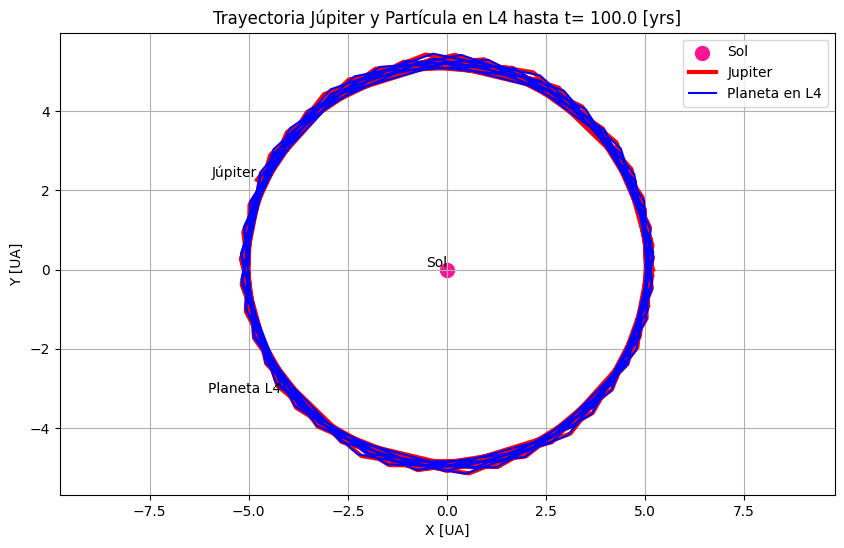

In [116]:
#Plot figura
plt.figure(figsize=(10, 6))

#Plot de cada cuerpo
plt.scatter(x_sol[0], y_sol[0], color='deeppink', label='Sol', s=100)    #Sol
plt.plot(x_jupiter, y_jupiter, label='Jupiter', color="red", linewidth=3)    #Trayectoria Jupiter
plt.plot(x_planeta_L4, y_planeta_L4, label=f"Planeta en L{4 if eleccion_L4_L5 == 'L4' else 5}", color="blue")  # Trayectoria Partícula

#Añadir etiquetas
plt.text(x_sol[0], y_sol[0], "Sol", verticalalignment="bottom", horizontalalignment="right")
plt.text(x_jupiter[-1], y_jupiter[-1], "Júpiter", verticalalignment="bottom", horizontalalignment="right")
plt.text(x_planeta_L4[-1], y_planeta_L4[-1], "Planeta L4", verticalalignment="top", horizontalalignment="right")

#Ploteo de los detalles
plt.title(f"Trayectoria Júpiter y Partícula en L{4 if eleccion_L4_L5 == 'L4' else 5} hasta t= {tiempo_final} [yrs]" )
plt.ylabel('Y [UA]')
plt.xlabel('X [UA]')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Mantiene la proporción 1:1 en los ejes
plt.show()


# **Distancia radial Júpiter y Partícula en L4/L5**

* A continuación, el usuario podra presenciar como evolucionan las distancias radiales en unidades astronómicas de ambos cuerpos de la simulación en función del tiempo en años que fue elegido inicialemnte. Esto permite observar de mejor manera el comportamiento de la trayectoria de ambos cuerpos respecto al Sol a medida que pasa el tiempo.



* ### **Evolución distancias radiales y Plot de datos:**
Se guardan las distancias radiales de los cuerpos hasta llegar al tiempo final y se muestran estos datos en un gráfico de Distancia Radial versus Tiempo.

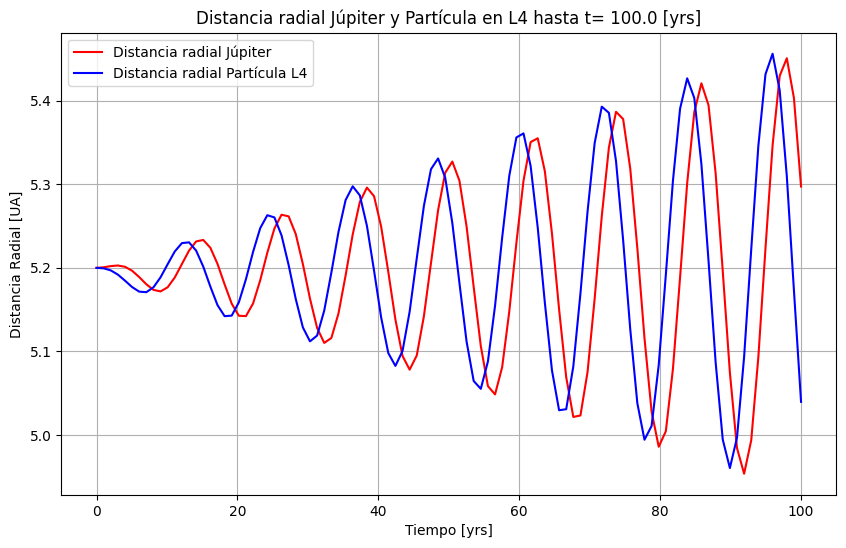

In [117]:
#Listas para guardar las distancias radiales de los cuerpos
radial_jupiter= []
radiaal_planeta= []
dist_cuerpos= []
tiempo= []

#Ciclo para recorrer la lista times con tal de ver la d_radial de cada cuerpo en el tiempo
for take in times:
  sim.integrate(take)
  radial_jupiter.append(np.sqrt(sim.particles[1].x**2 + sim.particles[1].y**2))     # Para Júpiter
  radiaal_planeta.append(np.sqrt(sim.particles[2].x**2 + sim.particles[2].y**2))    # Para Planeta L4/L5
  dist_cuerpos.append(np.sqrt((sim.particles[1].x-sim.particles[2].x)**2 + (sim.particles[1].y-sim.particles[2].y)**2))    # Distancia entre Júpiter y Planeta L4/L5
  tiempo.append(take)

plt.figure(figsize=(10, 6))
plt.plot(times, radial_jupiter, label='Distancia radial Júpiter', color="red")
plt.plot(times, radiaal_planeta, label=(f"Distancia radial Partícula L{4 if eleccion_L4_L5 == 'L4' else 5}"), color= "blue")
plt.title(f"Distancia radial Júpiter y Partícula en L{4 if eleccion_L4_L5 == 'L4' else 5} hasta t= {tiempo_final} [yrs]" )
plt.ylabel('Distancia Radial [UA]')
plt.xlabel('Tiempo [yrs]')
plt.legend()
plt.grid(True)
plt.show()


# **Distancia entre Júpiter y Partícula en L4/L5 versus el Tiempo**

* Ahora, se muestra el Plot de la separación entre Jupiter y el objeto en L4 o L5. Esto es útil, debido a que este gráfico permite analizar si la órbita del objeto en L4 o L5 es estable a lo largo del tiempo. Si la separación radial fluctúa dentro de un rango pequeño sin aumentar exponencialmente, esto indicaría que la configuración es estable en el largo plazo.

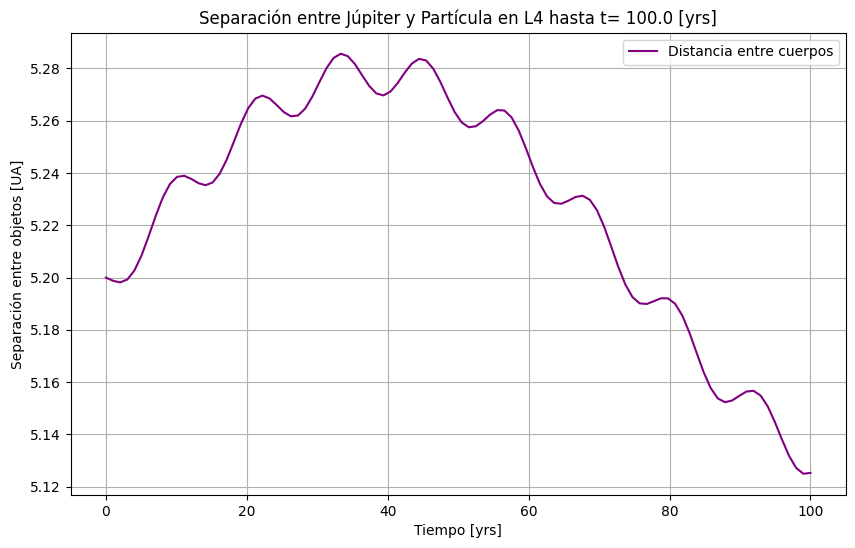

In [118]:
#Plot del gráfico

plt.figure(figsize=(10,6))
plt.plot(times, dist_cuerpos, label= "Distancia entre cuerpos", color="purple")
plt.title(f"Separación entre Júpiter y Partícula en L{4 if eleccion_L4_L5 == 'L4' else 5} hasta t= {tiempo_final} [yrs]" )
plt.xlabel("Tiempo [yrs]")
plt.ylabel('Separación entre objetos [UA]')
plt.legend()
plt.grid(True)
plt.show()

# **Potencial efectivo versus Distancia Radial (Júpiter y Partícula ) :**


* El gráfico de potencial efectivo muestra los puntos de equilibrio en el sistema, como los puntos lagrangianos. Los mínimos locales en el gráfico indican posiciones estables donde una partícula puede permanecer sin moverse considerablemente

* ### **Nueva evolución del sistema (Júpiter y Partícula):**
Analizar de mejor manera el potencial efectivo de Júpiter y de la partícula mediante un gráfico de Potencial Efectivo versus Distancia Radial.

In [119]:
# Función para calcular el potencial efectivo con el término angular corregido
def calcular_potencial_efectivo(r_sol, r_jupiter, L, m, m_sun, m_jupiter):

    G = 4 * np.pi**2  # Constante gravitacional en AU^3 / (yr^2 M_sol)
    # Potencial gravitacional del Sol y Júpiter + término angular (centrífugo)
    potencial = L**2 / (2 * m * r_sol**2) - G * m_sun / r_sol - G * m_jupiter / r_jupiter

    return potencial

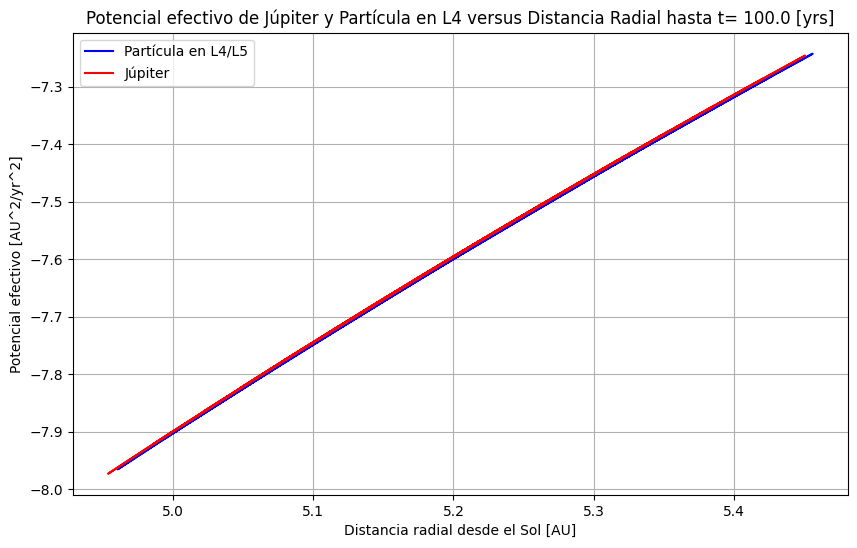

In [120]:
# Listas para guardar las distancias y los potenciales efectivos
distancias_sol_particula = []
distancias_sol_jupiter = []
potenciales_efectivos_particula = []
potenciales_efectivos_jupiter = []

# Ejecutar la simulación y calcular el potencial efectivo en cada paso
for time in times:
    sim.integrate(time)

    # Posiciones actuales
    sol = sim.particles[0]
    jupiter = sim.particles[1]
    particula = sim.particles[2]

    # Calcular las distancias radiales desde el Sol y desde Júpiter
    r_sol_particula = np.sqrt(particula.x**2 + particula.y**2)  # Distancia al Sol (partícula)
    r_jupiter_particula = np.sqrt((particula.x - jupiter.x)**2 + (particula.y - jupiter.y)**2)  # Distancia a Júpiter (partícula)

    r_sol_jupiter = np.sqrt(jupiter.x**2 + jupiter.y**2)  # Distancia al Sol (Júpiter)

    # Calcular el potencial efectivo para la partícula
    # Momento angular de la partícula en L4/L5
    L_particula = m_particula * r_jupiter**2 * omega
    potencial_particula = calcular_potencial_efectivo(r_sol_particula, r_jupiter_particula, L_particula, m_particula, m_sun, m_jupiter)

    # Calcular el potencial efectivo para Júpiter
    L_jupiter = m_jupiter * r_sol_jupiter**2 * omega  # Momento angular de Júpiter
    potencial_jupiter = calcular_potencial_efectivo(r_sol_jupiter,r_jupiter_particula, L_jupiter, m_jupiter, m_sun, m_jupiter)  # Distancia pequeña para evitar división por cero

    # Guardar los resultados
    distancias_sol_particula.append(r_sol_particula)
    distancias_sol_jupiter.append(r_sol_jupiter)
    potenciales_efectivos_particula.append(potencial_particula)
    potenciales_efectivos_jupiter.append(potencial_jupiter)

# Graficar el potencial efectivo vs la distancia radial desde el Sol para cada cuerpo
plt.figure(figsize=(10, 6))

# Potencial de la partícula
plt.plot(distancias_sol_particula, potenciales_efectivos_particula, label='Partícula en L4/L5', color='blue')

# Potencial de Júpiter
plt.plot(distancias_sol_jupiter, potenciales_efectivos_jupiter, label='Júpiter', color='red')

# Añadir etiquetas y detalles
plt.xlabel('Distancia radial desde el Sol [AU]')
plt.ylabel('Potencial efectivo [AU^2/yr^2]')
plt.title(f"Potencial efectivo de Júpiter y Partícula en L{4 if eleccion_L4_L5 == 'L4' else 5} versus Distancia Radial hasta t= {tiempo_final} [yrs]" )
plt.grid(True)
plt.legend()
plt.show()


# **Varios cuerpos para L4/L5**

* A continuación, se dispondrá un sistema con varias partículas de la misma masa reducida cercanas a L4 o L5 (según elección del usuario), manteniendo los cuerpos principales, como el Sol y Júpiter. Este test es útil para evaluar la estabilidad de las regiones y determinar en qué partes las partículas son más estables en los puntos lagrangianos L4 o L5.

* ### **LIBRERIAS Y FUNCIONES POSICIÓN DE OBJETOS CELESTES:**
Se importan las librerias para el funcionamiento del código

In [121]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

* ### **CREACIÓN DE LA  SEGUNDA SIMULACIÓN:**
Se crean los parámetros de la simulación. En este caso, se añade el Sol, Júpiter y las partículas pequeñas junto a sus masas y velocidades iniciales.

**A continuación, seleccione si desea visualizar las partículas iniciar en L4 o L5 y hasta qué paso de tiempo quiere observar la evolución del sistema:**

In [122]:
print("Nota: Esciba a continuación \"L4\" o \"L5\" ")
eleccion_L4_L5=input("Elija ver L4 o L5 en el sistema: ")
print("Nota: Esciba a continuación el tiempo en números enteros postivos ")
pasos_tiempo_varios_cuerpos=int(input("Introduzca el tiermpo en yrs: "))

Nota: Esciba a continuación "L4" o "L5" 
Elija ver L4 o L5 en el sistema: L5
Nota: Esciba a continuación el tiempo en números enteros postivos 
Introduzca el tiermpo en yrs: 10


In [123]:
# Crear la simulación
sim2 = rebound.Simulation()

# Definir las unidades de la simulación (antes de añadir las partículas)
sim2.units = ('AU', 'yr', 'Msun')

# Parámetros del sistema
m_sun = 1.0          # Masa del Sol en masas solares
m_jupiter = 0.0009543 # Masa de Júpiter en masas solares
r_jupiter = 5.2       # Distancia de Júpiter al Sol en AU
m_particula = 1e-15   # Masa de las partículas añadidas (P3, P4, P5, P6)
G = 4 * np.pi**2      # Constante gravitacional en AU^3 / (yr^2 M_sol)


# Añadir el Sol
sim2.add(m=m_sun)

# Añadir Júpiter
sim2.add(m=m_jupiter, a=r_jupiter)

# Obtener la velocidad angular de Júpiter
omega = np.sqrt(G * m_sun / r_jupiter**3)  # Velocidad angular en radianes por año

if eleccion_L4_L5 == "L4":

  # Añadir la partícula en L4
  x_L4 = r_jupiter * np.cos(np.pi/3)  # 60 grados = pi/3 radianes
  y_L4 = r_jupiter * np.sin(np.pi/3)
  v_L4 = omega * r_jupiter  # Velocidad tangencial
  vx_L4 = -v_L4 * np.sin(np.pi/3)  # Componente en x
  vy_L4 = v_L4 * np.cos(np.pi/3)   # Componente en y
  sim2.add(m=m_particula, x=x_L4, y=y_L4, vx=vx_L4, vy=vy_L4)

  # Añadir las partículas adicionales P3, P4, P5, P6

  # P3: Radio = 5.2 AU, Inclinación = 5pi/12
  r_P3 = 5.2
  theta_P3 = 5 * np.pi / 12
  x_P3 = r_P3 * np.cos(theta_P3)
  y_P3 = r_P3 * np.sin(theta_P3)
  v_P3 = omega * r_P3
  vx_P3 = -v_P3 * np.sin(theta_P3)
  vy_P3 = v_P3 * np.cos(theta_P3)
  sim2.add(m=m_particula, x=x_P3, y=y_P3, vx=vx_P3, vy=vy_P3)

  # P4: Radio = 5.2 AU, Inclinación = pi/4
  r_P4 = 5.2
  theta_P4 = np.pi / 4
  x_P4 = r_P4 * np.cos(theta_P4)
  y_P4 = r_P4 * np.sin(theta_P4)
  v_P4 = omega * r_P4
  vx_P4 = -v_P4 * np.sin(theta_P4)
  vy_P4 = v_P4 * np.cos(theta_P4)
  sim2.add(m=m_particula, x=x_P4, y=y_P4, vx=vx_P4, vy=vy_P4)

  # P5: Radio = 5.0 AU, Inclinación = pi/3
  r_P5 = 5.0
  theta_P5 = np.pi / 3
  x_P5 = r_P5 * np.cos(theta_P5)
  y_P5 = r_P5 * np.sin(theta_P5)
  v_P5 = omega * r_P5
  vx_P5 = -v_P5 * np.sin(theta_P5)
  vy_P5 = v_P5 * np.cos(theta_P5)
  sim2.add(m=m_particula, x=x_P5, y=y_P5, vx=vx_P5, vy=vy_P5)

  # P6: Radio = 5.5 AU, Inclinación = pi/3
  r_P6 = 5.5
  theta_P6 = np.pi / 3
  x_P6 = r_P6 * np.cos(theta_P6)
  y_P6 = r_P6 * np.sin(theta_P6)
  v_P6 = omega * r_P6
  vx_P6 = -v_P6 * np.sin(theta_P6)
  vy_P6 = v_P6 * np.cos(theta_P6)
  sim2.add(m=m_particula, x=x_P6, y=y_P6, vx=vx_P6, vy=vy_P6)

elif eleccion_L4_L5 == "L5":

  # Añadir la partícula en L5
  x_L4 = r_jupiter * np.cos(-np.pi/3)  # 60 grados = pi/3 radianes
  y_L4 = r_jupiter * np.sin(-np.pi/3)
  v_L4 = omega * r_jupiter  # Velocidad tangencial
  vx_L4 = -v_L4 * np.sin(-np.pi/3)  # Componente en x
  vy_L4 = v_L4 * np.cos(-np.pi/3)   # Componente en y
  sim2.add(m= m_particula, x=x_L4, y=y_L4, vx=vx_L4, vy=vy_L4)

  # Añadir las partículas adicionales P3, P4, P5, P6

  # P3: Radio = 5.2 AU, Inclinación = 5pi/12
  r_P3 = 5.2
  theta_P3 = -5 * np.pi / 12
  x_P3 = r_P3 * np.cos(theta_P3)
  y_P3 = r_P3 * np.sin(theta_P3)
  v_P3 = omega * r_P3
  vx_P3 = -v_P3 * np.sin(theta_P3)
  vy_P3 = v_P3 * np.cos(theta_P3)
  sim2.add(m=m_particula, x=x_P3, y=y_P3, vx=vx_P3, vy=vy_P3)

  # P4: Radio = 5.2 AU, Inclinación = pi/4
  r_P4 = 5.2
  theta_P4 = -np.pi / 4
  x_P4 = r_P4 * np.cos(theta_P4)
  y_P4 = r_P4 * np.sin(theta_P4)
  v_P4 = omega * r_P4
  vx_P4 = -v_P4 * np.sin(theta_P4)
  vy_P4 = v_P4 * np.cos(theta_P4)
  sim2.add(m=m_particula, x=x_P4, y=y_P4, vx=vx_P4, vy=vy_P4)

  # P5: Radio = 5.0 AU, Inclinación = pi/3
  r_P5 = 5.0
  theta_P5 = -np.pi / 3
  x_P5 = r_P5 * np.cos(theta_P5)
  y_P5 = r_P5 * np.sin(theta_P5)
  v_P5 = omega * r_P5
  vx_P5 = -v_P5 * np.sin(theta_P5)
  vy_P5 = v_P5 * np.cos(theta_P5)
  sim2.add(m=m_particula, x=x_P5, y=y_P5, vx=vx_P5, vy=vy_P5)

  # P6: Radio = 5.5 AU, Inclinación = pi/3
  r_P6 = 5.5
  theta_P6 = -np.pi / 3
  x_P6 = r_P6 * np.cos(theta_P6)
  y_P6 = r_P6 * np.sin(theta_P6)
  v_P6 = omega * r_P6
  vx_P6 = -v_P6 * np.sin(theta_P6)
  vy_P6 = v_P6 * np.cos(theta_P6)
  sim2.add(m=m_particula, x=x_P6, y=y_P6, vx=vx_P6, vy=vy_P6)



# Ejecutar la simulación por un breve periodo para verificar la estabilidad
sim2.integrate(1e-3)

* ### **EVOLUCIÓN DE LA SEGUNDA SIMULACIÓN:**  
Se definen los pasos de tiempo de la ejecución del sistema y se registran las posiciones de los cuerpos celestes hasta el punto especificado por el usuario anteriormente

In [124]:
#Lista del 0 al paso de tiempo que se estime con su respectivo numero de indices como "resolution"
resolution = 100
times2 = np.linspace(0, pasos_tiempo_varios_cuerpos ,num = resolution)

#Listas que guardaran la posicion de cada cuerpo de la simulación
x_sol=[]
y_sol=[]
x_jupiter=[]
y_jupiter=[]
x_planeta_2=[]
y_planeta_2=[]
x_planeta_3=[]
y_planeta_3=[]
x_planeta_4=[]
y_planeta_4=[]
x_planeta_5=[]
y_planeta_5=[]
x_planeta_6=[]
y_planeta_6=[]

#Integrador por el tiempo que por cada time, se guarda la posición de cada cuerpo en la simulación
for time in times2:
  sim2.integrate(time)
  x_sol.append(sim2.particles[0].x)    # (X) del sol
  y_sol.append(sim2.particles[0].y)    # (Y) del sol
  x_jupiter.append(sim2.particles[1].x)    # (X) del Júpiter
  y_jupiter.append(sim2.particles[1].y)    # (Y) del Júpiter
  x_planeta_2.append(sim2.particles[2].x)    # (X) de la Particula 2
  y_planeta_2.append(sim2.particles[2].y)    # (Y) de la Particula 2
  x_planeta_3.append(sim2.particles[3].x)    # (X) de la Particula 3
  y_planeta_3.append(sim2.particles[3].y)    # (Y) de la Particula 3
  x_planeta_4.append(sim2.particles[4].x)    # (X) de la Particula 4
  y_planeta_4.append(sim2.particles[4].y)    # (Y) de la Particula 4
  x_planeta_5.append(sim2.particles[5].x)    # (X) de la Particula 5
  y_planeta_5.append(sim2.particles[5].y)    # (Y) de la Particula 5
  x_planeta_6.append(sim2.particles[6].x)    # (X) de la Particula 6
  y_planeta_6.append(sim2.particles[6].y)    # (Y) de la Particula 6

#Tiempo final de la simulación
tiempo_final_2=str(sim2.t)      #sim.t sirve para ver el tiempo actualizado

* ### **PLOTEO DATOS**:
Se crea la figura y se introducen dentro de esta los datos recopilados por REBOUND para representar el sistema en el momento elegido.

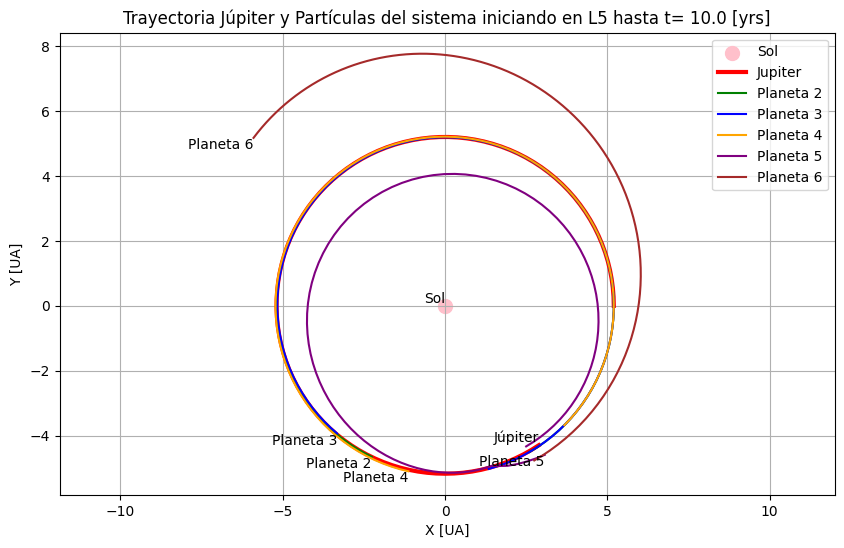

In [125]:
#Plot figura
plt.figure(figsize=(10, 6))

#Plot de cada cuerpo
plt.scatter(x_sol[0], y_sol[0], color='pink', label='Sol', s=100)    #Sol
plt.plot(x_jupiter, y_jupiter, label='Jupiter', color="red", linewidth=3)    #Trayectoria Júpiter
plt.plot(x_planeta_2, y_planeta_2, label='Planeta 2', color= "green")    #Trayectoria Particula 2
plt.plot(x_planeta_3, y_planeta_3, label='Planeta 3', color= "blue")    #Trayectoria Particula 3
plt.plot(x_planeta_4, y_planeta_4, label='Planeta 4', color= "orange")    #Trayectoria Particula 4
plt.plot(x_planeta_5, y_planeta_5, label='Planeta 5', color= "purple")    #Trayectoria Particula 5
plt.plot(x_planeta_6, y_planeta_6, label='Planeta 6', color= "brown")    #Trayectoria Particula 6

#Añadir etiquetas
plt.text(x_sol[0], y_sol[0], "Sol", verticalalignment="bottom", horizontalalignment="right")
plt.text(x_jupiter[-1], y_jupiter[-1], "Júpiter", verticalalignment="bottom", horizontalalignment="right")
plt.text(x_planeta_2[-1], y_planeta_2[-1], "Planeta 2", verticalalignment="top", horizontalalignment="right")
plt.text(x_planeta_3[-1], y_planeta_3[-1], "Planeta 3", verticalalignment="top", horizontalalignment="right")
plt.text(x_planeta_4[-1], y_planeta_4[-1], "Planeta 4", verticalalignment="top", horizontalalignment="right")
plt.text(x_planeta_5[-1], y_planeta_5[-1], "Planeta 5", verticalalignment="top", horizontalalignment="right")
plt.text(x_planeta_6[-1], y_planeta_6[-1], "Planeta 6", verticalalignment="top", horizontalalignment="right")

#Ploteo de los detalles
plt.title(f"Trayectoria Júpiter y Partículas del sistema iniciando en L{4 if eleccion_L4_L5 == 'L4' else 5} hasta t= {tiempo_final_2} [yrs]" )
plt.ylabel('Y [UA]')
plt.xlabel('X [UA]')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Mantiene la proporción 1:1 en los ejes
plt.show()


# **Distancia radial de Júpiter con los otros cuerpos versus el tiempo**

* Similar a la simulación anterior, se presenta un gráfico de Distancia Radial de todos los cuerpos celestes versus el tiempo. Gracias a este gráfico, se pueden sacar conclusiones respecto a cómo, de cierta manera, el punto lagrangiano actúa como un "imán" para las partículas que están más desplazadas del punto central (en este caso en la inclinación de π/3 y radio 5.2 AU), entre otras afirmaciones.

* ### **Evolución distancias radiales y Plot de datos:**
Se guardan las distancias radiales de los cuerpos hasta llegar al tiempo final y se muestran estos datos en un gráfico de Distancia Radial versus Tiempo.

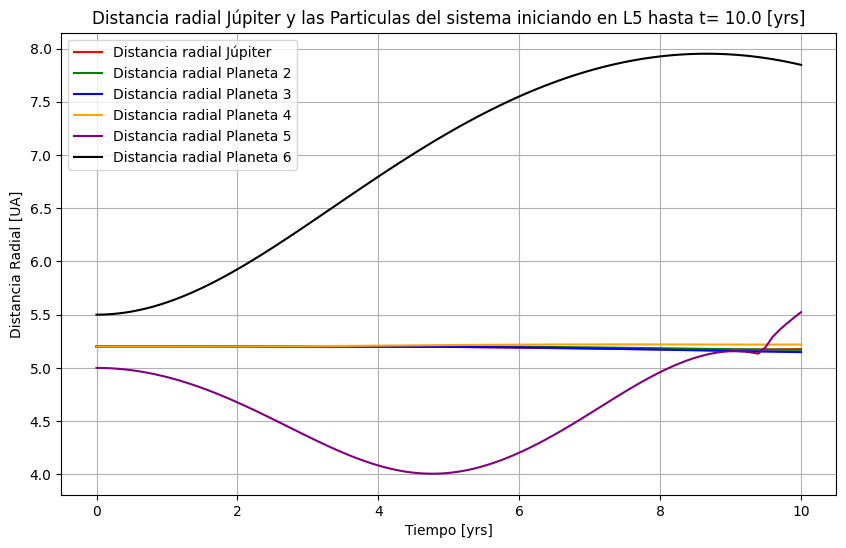

In [126]:
#Listas para guardar las distancias radiales de los cuerpos
radial_jupiter= []
radial_planeta_2= []
radial_planeta_3= []
radial_planeta_4= []
radial_planeta_5= []
radial_planeta_6= []
tiempo= []

#Ciclo para recorrer la lista times con tal de ver la d_radial de cada cuerpo en el tiempo
for take in times2:
  sim2.integrate(take)
  radial_jupiter.append(np.sqrt(sim2.particles[1].x**2 + sim2.particles[1].y**2))     # Para Júpiter
  radial_planeta_2.append(np.sqrt(sim2.particles[2].x**2 + sim2.particles[2].y**2))    # Para Particula 2
  radial_planeta_3.append(np.sqrt(sim2.particles[3].x**2 + sim2.particles[3].y**2))    # Para Particula 3
  radial_planeta_4.append(np.sqrt(sim2.particles[4].x**2 + sim2.particles[4].y**2))    # Para Particula 4
  radial_planeta_5.append(np.sqrt(sim2.particles[5].x**2 + sim2.particles[5].y**2))    # Para Particula 5
  radial_planeta_6.append(np.sqrt(sim2.particles[6].x**2 + sim2.particles[6].y**2))    # Para Particula 6
  tiempo.append(take)

plt.figure(figsize=(10, 6))
plt.plot(times2, radial_jupiter, label='Distancia radial Júpiter', color="red")
plt.plot(times2, radial_planeta_2, label='Distancia radial Planeta 2', color= "green")
plt.plot(times2, radial_planeta_3, label='Distancia radial Planeta 3', color= "blue")
plt.plot(times2, radial_planeta_4, label='Distancia radial Planeta 4', color= "orange")
plt.plot(times2, radial_planeta_5, label='Distancia radial Planeta 5', color= "purple")
plt.plot(times2, radial_planeta_6, label='Distancia radial Planeta 6', color= "black")


plt.title(f"Distancia radial Júpiter y las Particulas del sistema iniciando en L{4 if eleccion_L4_L5 == 'L4' else 5} hasta t= {tiempo_final_2} [yrs]" )
plt.ylabel('Distancia Radial [UA]')
plt.xlabel('Tiempo [yrs]')
plt.legend()
plt.grid(True)
plt.show()

# **Potencial efectivo versus Distancia Radial (Júpiter y varias Partículas) :**

* Parecido a la simulación anterior, se calcula el potencial efectivo de cada uno de los objetos en el sistema, ya que permite estudiar los pozos gravitacionales donde las partículas tienden a quedar atrapadas. Analizar cómo el potencial varía con la distancia permite identificar si hay regiones cerca de L4 o L5 donde las partículas tienden a quedar atrapadas, lo que sería indicativo de estabilidad.

* ### **Nueva evolución del sistema (Júpiter y varias Partículas ):**
Analizar de mejor manera el potencial efectivo de Júpiter y las demás partículas mediante un gráfico de Potencial Efectivo versus Distancia Radial.

In [127]:
# Función para calcular el potencial efectivo con el término angular corregido
def calcular_potencial_efectivo(r_sol, r_jupiter, L, m, m_sun, m_jupiter):

    G = 4 * np.pi**2  # Constante gravitacional en AU^3 / (yr^2 M_sol)
    # Potencial gravitacional del Sol y Júpiter + término angular (centrífugo)
    potencial = L**2 / (2 * m * r_sol**2) - G * m_sun / r_sol - G * m_jupiter / r_jupiter

    return potencial

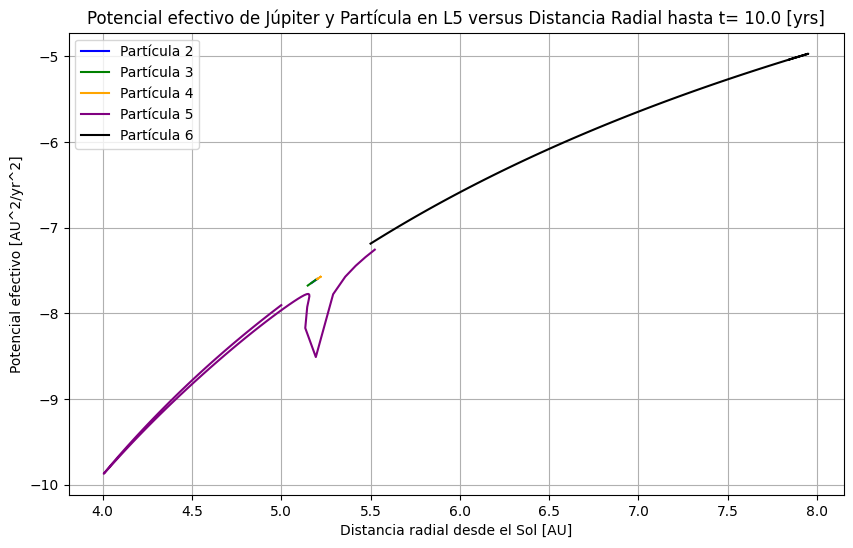

In [128]:
# Listas para guardar las distancias y los potenciales efectivos
distancias_sol_particula_2 = []
distancias_sol_particula_3 = []
distancias_sol_particula_4 = []
distancias_sol_particula_5 = []
distancias_sol_particula_6 = []
distancias_sol_jupiter = []

potenciales_efectivos_particula_2 = []
potenciales_efectivos_particula_3 = []
potenciales_efectivos_particula_4 = []
potenciales_efectivos_particula_5 = []
potenciales_efectivos_particula_6 = []
potenciales_efectivos_jupiter = []

# Ejecutar la simulación y calcular el potencial efectivo en cada paso
for time in times2:
    sim2.integrate(time)

    # Posiciones actuales
    sol = sim2.particles[0]
    jupiter = sim2.particles[1]
    particula_2 = sim2.particles[2]
    particula_3 = sim2.particles[3]
    particula_4 = sim2.particles[4]
    particula_5 = sim2.particles[5]
    particula_6 = sim2.particles[6]

    # Calcular las distancias radiales desde el Sol a las partículas
    r_sol_particula_2 = np.sqrt(particula_2.x**2 + particula_2.y**2)  # Distancia al Sol (partícula 2)
    r_sol_particula_3 = np.sqrt(particula_3.x**2 + particula_3.y**2)  # Distancia al Sol (partícula 3)
    r_sol_particula_4 = np.sqrt(particula_4.x**2 + particula_4.y**2)  # Distancia al Sol (partícula 4)
    r_sol_particula_5 = np.sqrt(particula_5.x**2 + particula_5.y**2)  # Distancia al Sol (partícula 5)
    r_sol_particula_6 = np.sqrt(particula_6.x**2 + particula_6.y**2)  # Distancia al Sol (partícula 6)

    # Calcular las distancias radiales desde el Sol a las partículas
    r_jupiter_particula_2= np.sqrt((particula_2.x - jupiter.x)**2 + (particula_2.y - jupiter.y)**2)  # Distancia a Júpiter (partícula 2)
    r_jupiter_particula_3= np.sqrt((particula_3.x - jupiter.x)**2 + (particula_3.y - jupiter.y)**2)  # Distancia a Júpiter (partícula 3)
    r_jupiter_particula_4= np.sqrt((particula_4.x - jupiter.x)**2 + (particula_4.y - jupiter.y)**2)  # Distancia a Júpiter (partícula 4)
    r_jupiter_particula_5= np.sqrt((particula_5.x - jupiter.x)**2 + (particula_5.y - jupiter.y)**2)  # Distancia a Júpiter (partícula 5)
    r_jupiter_particula_6= np.sqrt((particula_6.x - jupiter.x)**2 + (particula_6.y - jupiter.y)**2)  # Distancia a Júpiter (partícula 6)

    # Calcular las distancias radiales desde el Sol a Júpiter
    r_sol_jupiter = np.sqrt(jupiter.x**2 + jupiter.y**2)  # Distancia al Sol (Júpiter)

    # Calcular el potencial efectivo para la partícula
    # Momento angular de la partícula en L4/L5
    L_particula_2 = m_particula * r_sol_particula_2**2 * omega
    L_particula_3 = m_particula * r_sol_particula_3**2 * omega
    L_particula_4 = m_particula * r_sol_particula_4**2 * omega
    L_particula_5 = m_particula * r_sol_particula_5**2 * omega
    L_particula_6 = m_particula * r_sol_particula_6**2 * omega


    potencial_particula_2 = calcular_potencial_efectivo(r_sol_particula_2, r_jupiter_particula_2, L_particula_2, m_particula, m_sun, m_jupiter)
    potencial_particula_3 = calcular_potencial_efectivo(r_sol_particula_3, r_jupiter_particula_3, L_particula_3, m_particula, m_sun, m_jupiter)
    potencial_particula_4 = calcular_potencial_efectivo(r_sol_particula_4, r_jupiter_particula_4, L_particula_4, m_particula, m_sun, m_jupiter)
    potencial_particula_5 = calcular_potencial_efectivo(r_sol_particula_5, r_jupiter_particula_5, L_particula_5, m_particula, m_sun, m_jupiter)
    potencial_particula_6 = calcular_potencial_efectivo(r_sol_particula_6, r_jupiter_particula_6, L_particula_6, m_particula, m_sun, m_jupiter)

    # Calcular el potencial efectivo para Júpiter
    #L_jupiter = m_jupiter * r_sol_jupiter**2 * omega  # Momento angular de Júpiter
    #potencial_jupiter = calcular_potencial_efectivo(r_sol_jupiter,r_jupiter_particula, L_jupiter, m_jupiter, m_sun, m_jupiter)  # Distancia pequeña para evitar división por cero

    # Guardar los resultados
    distancias_sol_particula_2.append(r_sol_particula_2)
    distancias_sol_particula_3.append(r_sol_particula_3)
    distancias_sol_particula_4.append(r_sol_particula_4)
    distancias_sol_particula_5.append(r_sol_particula_5)
    distancias_sol_particula_6.append(r_sol_particula_6)
    distancias_sol_jupiter.append(r_sol_jupiter)

    potenciales_efectivos_particula_2.append(potencial_particula_2)
    potenciales_efectivos_particula_3.append(potencial_particula_3)
    potenciales_efectivos_particula_4.append(potencial_particula_4)
    potenciales_efectivos_particula_5.append(potencial_particula_5)
    potenciales_efectivos_particula_6.append(potencial_particula_6)
    potenciales_efectivos_jupiter.append(potencial_jupiter)

# Graficar el potencial efectivo vs la distancia radial desde el Sol para cada cuerpo
plt.figure(figsize=(10, 6))

# Potencial de la partícula
plt.plot(distancias_sol_particula_2, potenciales_efectivos_particula_2, label="Partícula 2", color='blue')
plt.plot(distancias_sol_particula_3, potenciales_efectivos_particula_3, label="Partícula 3", color='green')
plt.plot(distancias_sol_particula_4, potenciales_efectivos_particula_4, label="Partícula 4", color='orange')
plt.plot(distancias_sol_particula_5, potenciales_efectivos_particula_5, label="Partícula 5", color='purple')
plt.plot(distancias_sol_particula_6, potenciales_efectivos_particula_6, label="Partícula 6", color='black')

# Potencial de Júpiter
#plt.plot(distancias_sol_jupiter, potenciales_efectivos_jupiter, label='Júpiter', color='red')

# Añadir etiquetas y detalles
plt.xlabel('Distancia radial desde el Sol [AU]')
plt.ylabel('Potencial efectivo [AU^2/yr^2]')
plt.title(f"Potencial efectivo de Júpiter y Partícula en L{4 if eleccion_L4_L5 == 'L4' else 5} versus Distancia Radial hasta t= {tiempo_final_2} [yrs]" )
plt.grid(True)
plt.legend()
plt.show()


# **Variación de masa de Júpiter:**

* Siguiendo, en este apartado, se probará un sistema similar a la primera simulación realizada en este código, pero esta vez se ejecutará una simulación donde Júpiter tendrá el 0.5 de su masa normal y otra donde tendrá 2 veces su masa. Estos dos casos extremos serán muy útiles, ya que permitirán observar cómo varía la estabilidad de la partícula en función de la masa de Júpiter.

* ### **JUPITER 0.5 DE MASA:**
Apartado para la simulación de Júpiter con el 0.5 de su masa normal

* ### **LIBRERIAS Y FUNCIONES POSICIÓN DE OBJETOS CELESTES:**
Se importan las librerias para el funcionamiento del código y se definen dos funciones útiles para obtener la posición de Júpiter y la partícula en coordenadas polares

In [129]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from datetime import datetime, timedelta

* ### **CREACIÓN DE LA TERCERA SIMULACIÓN:**
Se crean los parametros de la simulación. En este caso, se añade el Sol, Júpiter con 0.5 de su masa y la partícula de masa pequeña junto a sus masas y velocidades iniciales.

**A continuación, seleccione si desea visualizar la partícula en L4 o L5 y hasta qué paso de tiempo quiere observar la evolución del sistema:**

In [130]:
print("Nota: Esciba a continuación \"L4\" o \"L5\" ")
eleccion_L4_L5=input("Elija ver L4 o L5 en el sistema: ")
print("Nota: Esciba a continuación el tiempo en números enteros postivos ")
pasos_tiempo_3=int(input("Introduzca el tiermpo en yrs: "))

Nota: Esciba a continuación "L4" o "L5" 
Elija ver L4 o L5 en el sistema: L4
Nota: Esciba a continuación el tiempo en números enteros postivos 
Introduzca el tiermpo en yrs: 50


In [131]:
# Crear la simulación
sim3 = rebound.Simulation()

# Definir las unidades de la simulación (antes de añadir las partículas)
sim3.units = ('AU', 'yr', 'Msun')

# Parámetros del sistema
m_sun = 1.0          # Masa del Sol en masas solares
m_jupiter = 0.00047715 # Masa de Júpiter en masas solares
m_particula = 1e-15   # Masa de la partícula (despreciable)
r_jupiter = 5.2       # Distancia de Júpiter al Sol en AU
G = 4 * np.pi**2      # Constante gravitacional en AU^3 / (yr^2 M_sol)

# Añadir el Sol
sim3.add(m=m_sun)

# Añadir Júpiter
sim3.add(m=m_jupiter, a=r_jupiter)


In [132]:
# Velocidad angular de Júpiter
omega = np.sqrt(G * m_sun / r_jupiter**3)  # Omega en radianes por año

# Posición de la partícula en L4 o L5 (coordenadas x, y respecto al Sol)

if eleccion_L4_L5 == "L4":
  x_L4 = r_jupiter * np.cos(np.pi/3)  # 60 grados = pi/3 radianes
  y_L4 = r_jupiter * np.sin(np.pi/3)

  # Velocidades iniciales para la partícula en L4
  v_L4 = omega * r_jupiter  # Velocidad tangencial
  vx_L4 = -v_L4 * np.sin(np.pi/3)  # Componente en x
  vy_L4 = v_L4 * np.cos(np.pi/3)   # Componente en y

elif eleccion_L4_L5 == "L5":
  x_L4= r_jupiter * np.cos(-np.pi/3)  # -60 grados = -pi/3 radianes
  y_L4= r_jupiter * np.sin(-np.pi/3)

  # Velocidades iniciales para la partícula en L4
  v_L4 = omega * r_jupiter  # Velocidad tangencial
  vx_L4 = -v_L4 * np.sin(-np.pi/3)  # Componente en x
  vy_L4 = v_L4 * np.cos(-np.pi/3)   # Componente en y

# Añadir la partícula
sim3.add(m=m_particula, x=x_L4, y=y_L4, vx=vx_L4, vy=vy_L4)

# Ejecutar la simulación por un breve periodo para verificar la estabilidad
sim3.integrate(1e-3)

* ### **EVOLUCIÓN DE LA SIMULACIÓN:**  
Se definen los pasos de tiempo de la ejecución del sistema y se registran las posiciones de los cuerpos celestes hasta el punto especificado por el usuario anteriormente

In [133]:
#Lista del 0 al paso de tiempo que se estime con su respectivo numero de indices como "resolution"
resolution = 100
times3 = np.linspace(0, pasos_tiempo_3,num = resolution)

#Listas que guardaran la posicion de cada cuerpo de la simulación
x_jupiter=[]
y_jupiter=[]
x_planeta_L4=[]
y_planeta_L4=[]
x_sol=[]
y_sol=[]

#Integrador por el tiempo que por cada time, se guarda la posición del cuerpo
for time in times3:
  sim3.integrate(time)
  x_sol.append(sim3.particles[0].x)    # (X) del sol
  y_sol.append(sim3.particles[0].y)    # (Y) del sol
  x_jupiter.append(sim3.particles[1].x)    # (X) del Jupiter
  y_jupiter.append(sim3.particles[1].y)    # (Y) del Jupiter
  x_planeta_L4.append(sim3.particles[2].x)    # (X) del Partícula
  y_planeta_L4.append(sim3.particles[2].y)    # (Y) del Partícula

#Tiempo final de la simulación
tiempo_final_3=str(sim3.t)      #sim.t sirve para ver el tiempo actualizado

* ### **PLOTEO DATOS**:
Se crea la figura y se introducen dentro de esta los datos recopilados por REBOUND para representar el sistema en el momento elegido.

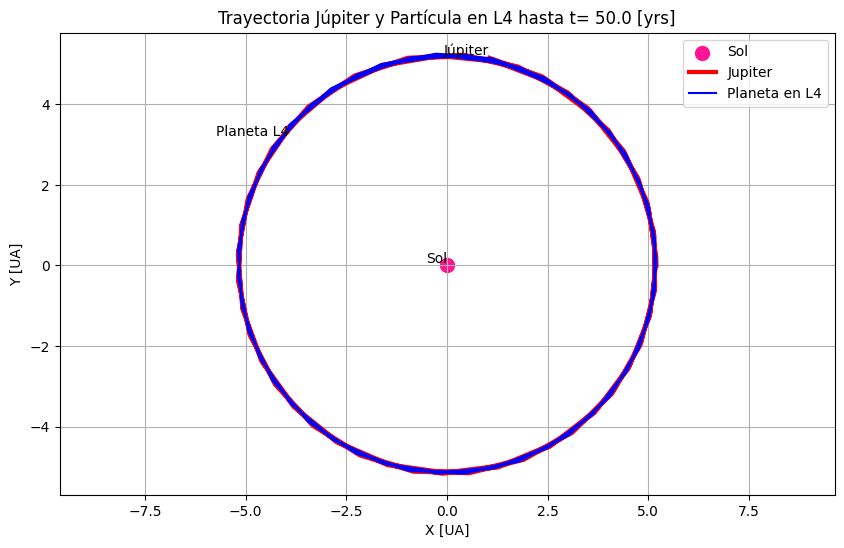

In [134]:
#Plot figura
plt.figure(figsize=(10, 6))

#Plot de cada cuerpo
plt.scatter(x_sol[0], y_sol[0], color='deeppink', label='Sol', s=100)    #Sol
plt.plot(x_jupiter, y_jupiter, label='Jupiter', color="red", linewidth=3)    #Trayectoria Jupiter
plt.plot(x_planeta_L4, y_planeta_L4, label=f"Planeta en L{4 if eleccion_L4_L5 == 'L4' else 5}", color="blue")  # Trayectoria Partícula

#Añadir etiquetas
plt.text(x_sol[0], y_sol[0], "Sol", verticalalignment="bottom", horizontalalignment="right")
plt.text(x_jupiter[-1], y_jupiter[-1], "Júpiter", verticalalignment="bottom", horizontalalignment="right")
plt.text(x_planeta_L4[-1], y_planeta_L4[-1], "Planeta L4", verticalalignment="top", horizontalalignment="right")

#Ploteo de los detalles
plt.title(f"Trayectoria Júpiter y Partícula en L{4 if eleccion_L4_L5 == 'L4' else 5} hasta t= {tiempo_final_3} [yrs]" )
plt.ylabel('Y [UA]')
plt.xlabel('X [UA]')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Mantiene la proporción 1:1 en los ejes
plt.show()

* # **Júpiter 0.5 de masa (Distancia radial Júpiter y Partícula en L4/L5):**
* A continuación, el usuario podra presenciar como evolucionan las distancias radiales en unidades astronómicas de ambos cuerpos de la simulación en función del tiempo en años que fue elegido inicialemnte. Esto permite observar de mejor manera el comportamiento de la trayectoria de ambos cuerpos respecto al Sol a medida que pasa el tiempo.

* ### **Evolución distancias radiales y Plot de datos:**
Se guardan las distancias radiales de los cuerpos hasta llegar al tiempo final y se muestran estos datos en un gráfico de Distancia Radial versus Tiempo.

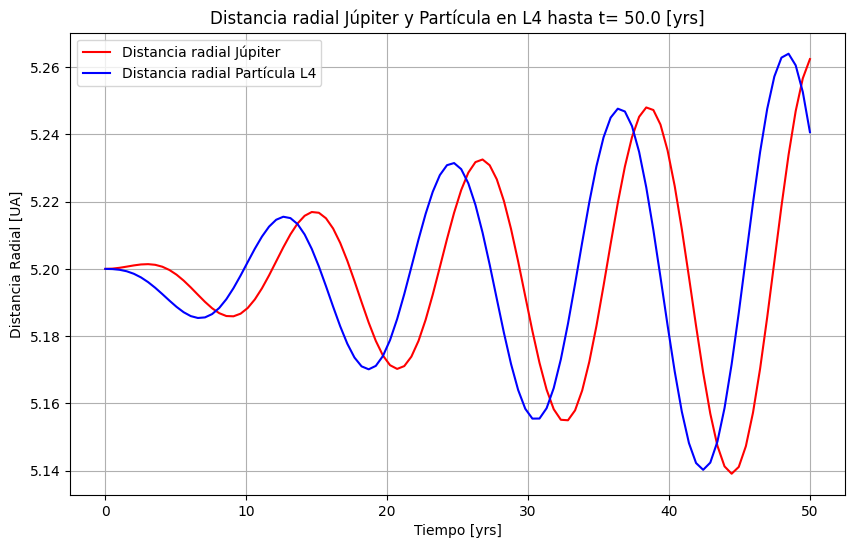

In [135]:
#Listas para guardar las distancias radiales de los cuerpos
radial_jupiter= []
radiaal_planeta= []
dist_cuerpos= []
tiempo= []

#Ciclo para recorrer la lista times con tal de ver la d_radial de cada cuerpo en el tiempo
for take in times3:
  sim3.integrate(take)
  radial_jupiter.append(np.sqrt(sim3.particles[1].x**2 + sim3.particles[1].y**2))     # Para Júpiter
  radiaal_planeta.append(np.sqrt(sim3.particles[2].x**2 + sim3.particles[2].y**2))    # Para Planeta L4/L5
  dist_cuerpos.append(np.sqrt((sim3.particles[1].x-sim3.particles[2].x)**2 + (sim3.particles[1].y-sim3.particles[2].y)**2))    # Distancia entre Júpiter y Planeta L4/L5
  tiempo.append(take)

plt.figure(figsize=(10, 6))
plt.plot(times3, radial_jupiter, label='Distancia radial Júpiter', color="red")
plt.plot(times3, radiaal_planeta, label=(f"Distancia radial Partícula L{4 if eleccion_L4_L5 == 'L4' else 5}"), color= "blue")
plt.title(f"Distancia radial Júpiter y Partícula en L{4 if eleccion_L4_L5 == 'L4' else 5} hasta t= {tiempo_final_3} [yrs]" )
plt.ylabel('Distancia Radial [UA]')
plt.xlabel('Tiempo [yrs]')
plt.legend()
plt.grid(True)
plt.show()

* # **Júpiter 0.5 de masa (Distancia entre Júpiter y Partícula en L4/L5 versus el Tiempo):**
* Ahora, se muestra el Plot de la separación entre Jupiter y el objeto en L4 o L5. Esto es útil, debido a que este gráfico permite analizar si la órbita del objeto en L4 o L5 es estable a lo largo del tiempo. Si la separación radial fluctúa dentro de un rango pequeño sin aumentar exponencialmente, esto indicaría que la configuración es estable en el largo plazo.

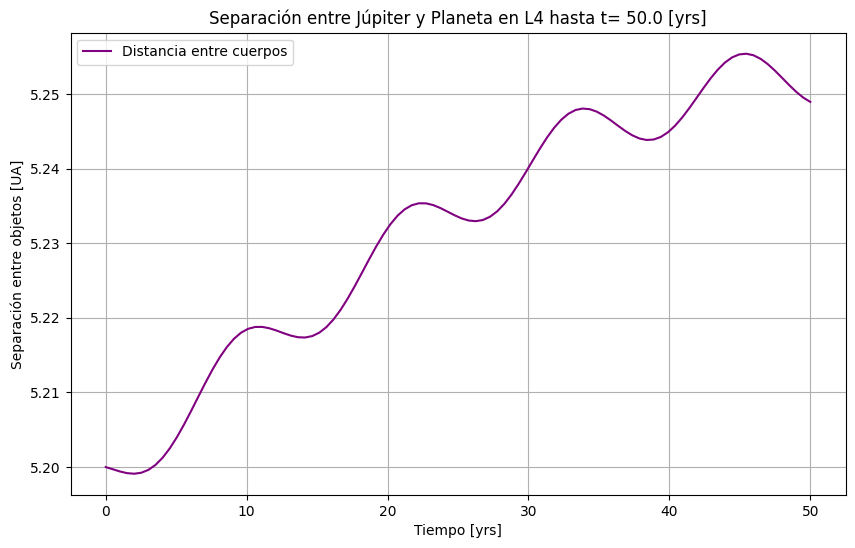

In [136]:
#Plot del gráfico

plt.figure(figsize=(10,6))
plt.plot(times3, dist_cuerpos, label= "Distancia entre cuerpos", color="purple")
plt.title(f"Separación entre Júpiter y Planeta en L{4 if eleccion_L4_L5 == 'L4' else 5} hasta t= {tiempo_final_3} [yrs]" )
plt.xlabel("Tiempo [yrs]")
plt.ylabel('Separación entre objetos [UA]')
plt.legend()
plt.grid(True)
plt.show()

* # **Júpiter 0.5 de masa (Potencial efectivo versus Distancia Radial (Júpiter y Partícula)):**
* El gráfico de potencial efectivo muestra los puntos de equilibrio en el sistema, como los puntos lagrangianos. Los mínimos locales en el gráfico indican posiciones estables donde una partícula puede permanecer sin moverse considerablemente

* ### **Nueva evolución del sistema (Júpiter y Partícula):**
Analizar de mejor manera el potencial efectivo de Júpiter y de la partícula mediante un gráfico de Potencial Efectivo versus Distancia Radial.

In [137]:
# Función para calcular el potencial efectivo con el término angular corregido
def calcular_potencial_efectivo(r_sol, r_jupiter, L, m, m_sun, m_jupiter):

    G = 4 * np.pi**2  # Constante gravitacional en AU^3 / (yr^2 M_sol)
    # Potencial gravitacional del Sol y Júpiter + término angular (centrífugo)
    potencial = L**2 / (2 * m * r_sol**2) - G * m_sun / r_sol - G * m_jupiter / r_jupiter

    return potencial

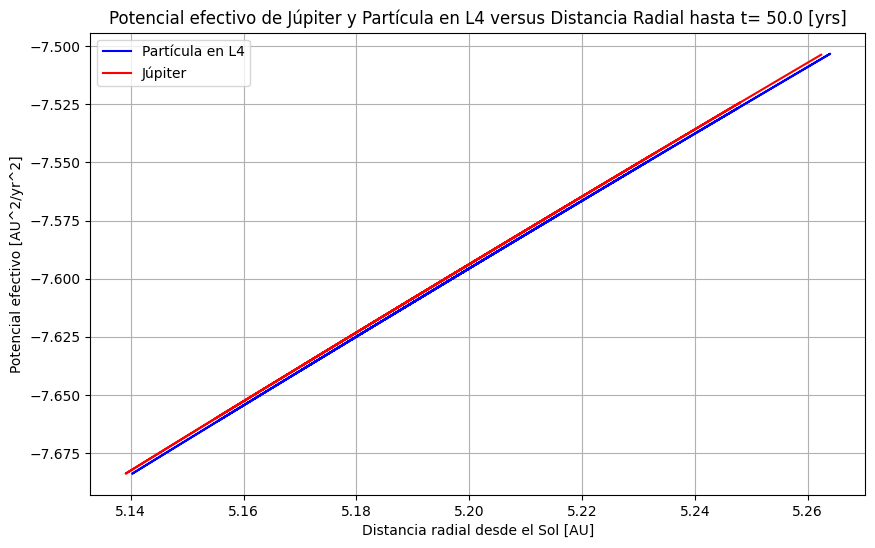

In [138]:
# Listas para guardar las distancias y los potenciales efectivos
distancias_sol_particula = []
distancias_sol_jupiter = []
potenciales_efectivos_particula = []
potenciales_efectivos_jupiter = []

# Ejecutar la simulación y calcular el potencial efectivo en cada paso
for time in times3:
    sim3.integrate(time)

    # Posiciones actuales
    sol = sim3.particles[0]
    jupiter = sim3.particles[1]
    particula = sim3.particles[2]

    # Calcular las distancias radiales desde el Sol y desde Júpiter
    r_sol_particula = np.sqrt(particula.x**2 + particula.y**2)  # Distancia al Sol (partícula)
    r_jupiter_particula = np.sqrt((particula.x - jupiter.x)**2 + (particula.y - jupiter.y)**2)  # Distancia a Júpiter (partícula)

    r_sol_jupiter = np.sqrt(jupiter.x**2 + jupiter.y**2)  # Distancia al Sol (Júpiter)

    # Calcular el potencial efectivo para la partícula
    # Momento angular de la partícula en L4/L5
    L_particula = m_particula * r_jupiter**2 * omega
    potencial_particula = calcular_potencial_efectivo(r_sol_particula, r_jupiter_particula, L_particula, m_particula, m_sun, m_jupiter)

    # Calcular el potencial efectivo para Júpiter
    L_jupiter = m_jupiter * r_sol_jupiter**2 * omega  # Momento angular de Júpiter
    potencial_jupiter = calcular_potencial_efectivo(r_sol_jupiter,r_jupiter_particula, L_jupiter, m_jupiter, m_sun, m_jupiter)  # Distancia pequeña para evitar división por cero

    # Guardar los resultados
    distancias_sol_particula.append(r_sol_particula)
    distancias_sol_jupiter.append(r_sol_jupiter)
    potenciales_efectivos_particula.append(potencial_particula)
    potenciales_efectivos_jupiter.append(potencial_jupiter)

# Graficar el potencial efectivo vs la distancia radial desde el Sol para cada cuerpo
plt.figure(figsize=(10, 6))

# Potencial de la partícula
plt.plot(distancias_sol_particula, potenciales_efectivos_particula, label=f"Partícula en L{4 if eleccion_L4_L5=='L4' else 5}", color='blue')

# Potencial de Júpiter
plt.plot(distancias_sol_jupiter, potenciales_efectivos_jupiter, label='Júpiter', color='red')

# Añadir etiquetas y detalles
plt.xlabel('Distancia radial desde el Sol [AU]')
plt.ylabel('Potencial efectivo [AU^2/yr^2]')
plt.title(f"Potencial efectivo de Júpiter y Partícula en L{4 if eleccion_L4_L5 == 'L4' else 5} versus Distancia Radial hasta t= {tiempo_final_3} [yrs]" )
plt.grid(True)
plt.legend()
plt.show()

* # **Júpiter 2 de masa (Visualización trayectoria 2D):**
Apartado para la simulación de Júpiter con el 2 de su masa normal

**NOTA:** EL ÚLTIMO TIEMPO SELECCIONADO ES EL QUE REGIRÁ ESTA CUARTA SIMULACIÓN

* ### **LIBRERIAS Y FUNCIONES POSICIÓN DE OBJETOS CELESTES:**
Se importan las librerias para el funcionamiento del código y se definen dos funciones útiles para obtener la posición de Júpiter y la partícula en coordenadas polares

In [139]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from datetime import datetime, timedelta

* ### **CREACIÓN DE LA CUARTA SIMULACIÓN:**
Se crean los parametros de la simulación. En este caso, se añade el Sol, Júpiter con 0.5 de su masa y la partícula de masa pequeña junto a sus masas y velocidades iniciales.


In [140]:
# Crear la simulación
sim4 = rebound.Simulation()

# Definir las unidades de la simulación (antes de añadir las partículas)
sim4.units = ('AU', 'yr', 'Msun')

# Parámetros del sistema
m_sun = 1.0          # Masa del Sol en masas solares
m_jupiter = 0.0019086 # Masa de Júpiter en masas solares
m_particula = 1e-15   # Masa de la partícula (despreciable)
r_jupiter = 5.2       # Distancia de Júpiter al Sol en AU
G = 4 * np.pi**2      # Constante gravitacional en AU^3 / (yr^2 M_sol)

# Añadir el Sol
sim4.add(m=m_sun)

# Añadir Júpiter
sim4.add(m=m_jupiter, a=r_jupiter)

In [141]:
# Velocidad angular de Júpiter
omega = np.sqrt(G * m_sun / r_jupiter**3)  # Omega en radianes por año

# Posición de la partícula en L4 o L5 (coordenadas x, y respecto al Sol)

if eleccion_L4_L5 == "L4":
  x_L4 = r_jupiter * np.cos(np.pi/3)  # 60 grados = pi/3 radianes
  y_L4 = r_jupiter * np.sin(np.pi/3)

  # Velocidades iniciales para la partícula en L4
  v_L4 = omega * r_jupiter  # Velocidad tangencial
  vx_L4 = -v_L4 * np.sin(np.pi/3)  # Componente en x
  vy_L4 = v_L4 * np.cos(np.pi/3)   # Componente en y

elif eleccion_L4_L5 == "L5":
  x_L4= r_jupiter * np.cos(-np.pi/3)  # -60 grados = -pi/3 radianes
  y_L4= r_jupiter * np.sin(-np.pi/3)

  # Velocidades iniciales para la partícula en L4
  v_L4 = omega * r_jupiter  # Velocidad tangencial
  vx_L4 = -v_L4 * np.sin(-np.pi/3)  # Componente en x
  vy_L4 = v_L4 * np.cos(-np.pi/3)   # Componente en y

# Añadir la partícula
sim4.add(m=m_particula, x=x_L4, y=y_L4, vx=vx_L4, vy=vy_L4)

# Ejecutar la simulación por un breve periodo para verificar la estabilidad
sim4.integrate(1e-3)

* ### **EVOLUCIÓN DE LA SIMULACIÓN:**  
Se definen los pasos de tiempo de la ejecución del sistema y se registran las posiciones de los cuerpos celestes hasta el punto especificado por el usuario anteriormente

In [142]:
#Lista del 0 al paso de tiempo que se estime con su respectivo numero de indices como "resolution"
resolution = 100
times3 = np.linspace(0, pasos_tiempo_3,num = resolution)

#Listas que guardaran la posicion de cada cuerpo de la simulación
x_jupiter=[]
y_jupiter=[]
x_planeta_L4=[]
y_planeta_L4=[]
x_sol=[]
y_sol=[]

#Integrador por el tiempo que por cada time, se guarda la posición del cuerpo
for time in times3:
  sim4.integrate(time)
  x_sol.append(sim4.particles[0].x)    # (X) del sol
  y_sol.append(sim4.particles[0].y)    # (Y) del sol
  x_jupiter.append(sim4.particles[1].x)    # (X) del Jupiter
  y_jupiter.append(sim4.particles[1].y)    # (Y) del Jupiter
  x_planeta_L4.append(sim4.particles[2].x)    # (X) del Partícula
  y_planeta_L4.append(sim4.particles[2].y)    # (Y) del Partícula


* ### **PLOTEO DATOS**:
Se crea la figura y se introducen dentro de esta los datos recopilados por REBOUND para representar el sistema en el momento elegido.

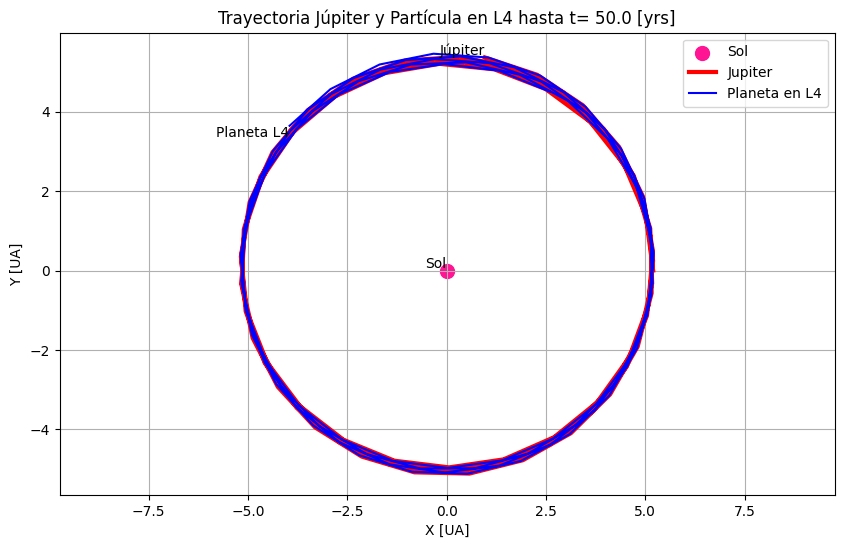

In [143]:
#Plot figura
plt.figure(figsize=(10, 6))

#Plot de cada cuerpo
plt.scatter(x_sol[0], y_sol[0], color='deeppink', label='Sol', s=100)    #Sol
plt.plot(x_jupiter, y_jupiter, label='Jupiter', color="red", linewidth=3)    #Trayectoria Jupiter
plt.plot(x_planeta_L4, y_planeta_L4, label=f"Planeta en L{4 if eleccion_L4_L5 == 'L4' else 5}", color="blue")  # Trayectoria Partícula

#Añadir etiquetas
plt.text(x_sol[0], y_sol[0], "Sol", verticalalignment="bottom", horizontalalignment="right")
plt.text(x_jupiter[-1], y_jupiter[-1], "Júpiter", verticalalignment="bottom", horizontalalignment="right")
plt.text(x_planeta_L4[-1], y_planeta_L4[-1], "Planeta L4", verticalalignment="top", horizontalalignment="right")

#Ploteo de los detalles
plt.title(f"Trayectoria Júpiter y Partícula en L{4 if eleccion_L4_L5 == 'L4' else 5} hasta t= {tiempo_final_3} [yrs]" )
plt.ylabel('Y [UA]')
plt.xlabel('X [UA]')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Mantiene la proporción 1:1 en los ejes
plt.show()

* # **Júpiter 2 de masa (Distancia radial Júpiter y Partícula en L4/L5):**
* A continuación, el usuario podra presenciar como evolucionan las distancias radiales en unidades astronómicas de ambos cuerpos de la simulación en función del tiempo en años que fue elegido inicialemnte. Esto permite observar de mejor manera el comportamiento de la trayectoria de ambos cuerpos respecto al Sol a medida que pasa el tiempo.

* ### **Evolución distancias radiales y Plot de datos:**
Se guardan las distancias radiales de los cuerpos hasta llegar al tiempo final y se muestran estos datos en un gráfico de Distancia Radial versus Tiempo.

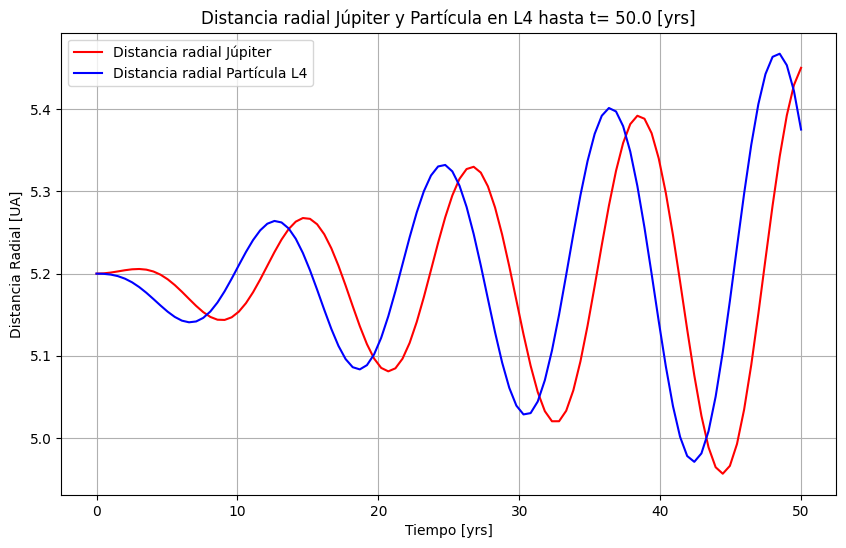

In [144]:
#Listas para guardar las distancias radiales de los cuerpos
radial_jupiter= []
radiaal_planeta= []
dist_cuerpos= []
tiempo= []

#Ciclo para recorrer la lista times con tal de ver la d_radial de cada cuerpo en el tiempo
for take in times3:
  sim4.integrate(take)
  radial_jupiter.append(np.sqrt(sim4.particles[1].x**2 + sim4.particles[1].y**2))     # Para Júpiter
  radiaal_planeta.append(np.sqrt(sim4.particles[2].x**2 + sim4.particles[2].y**2))    # Para Planeta L4/L5
  dist_cuerpos.append(np.sqrt((sim4.particles[1].x-sim4.particles[2].x)**2 + (sim4.particles[1].y-sim4.particles[2].y)**2))    # Distancia entre Júpiter y Planeta L4/L5
  tiempo.append(take)

plt.figure(figsize=(10, 6))
plt.plot(times3, radial_jupiter, label='Distancia radial Júpiter', color="red")
plt.plot(times3, radiaal_planeta, label=(f"Distancia radial Partícula L{4 if eleccion_L4_L5 == 'L4' else 5}"), color= "blue")
plt.title(f"Distancia radial Júpiter y Partícula en L{4 if eleccion_L4_L5 == 'L4' else 5} hasta t= {tiempo_final_3} [yrs]" )
plt.ylabel('Distancia Radial [UA]')
plt.xlabel('Tiempo [yrs]')
plt.legend()
plt.grid(True)
plt.show()

* # **Júpiter 2 de masa (Distancia entre Júpiter y Partícula en L4/L5 versus el Tiempo):**
* Ahora, se muestra el Plot de la separación entre Jupiter y el objeto en L4 o L5. Esto es útil, debido a que este gráfico permite analizar si la órbita del objeto en L4 o L5 es estable a lo largo del tiempo. Si la separación radial fluctúa dentro de un rango pequeño sin aumentar exponencialmente, esto indicaría que la configuración es estable en el largo plazo.

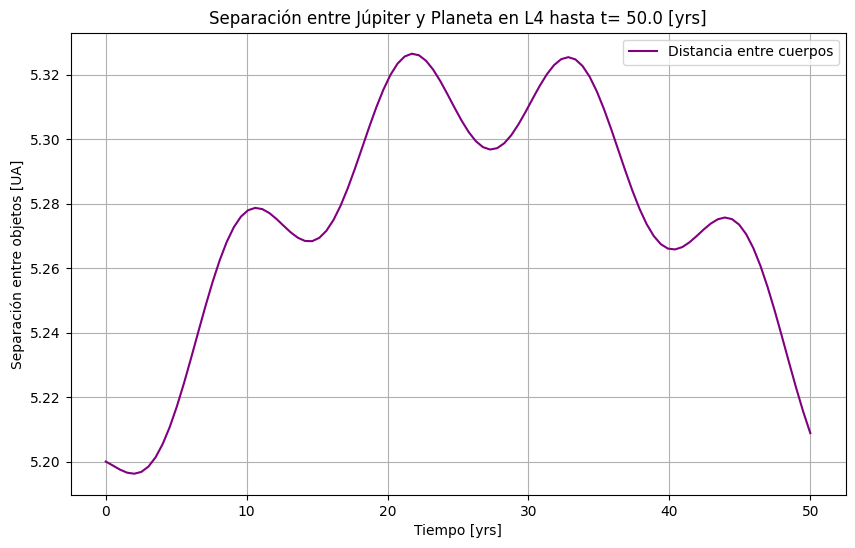

In [145]:
#Plot del gráfico

plt.figure(figsize=(10,6))
plt.plot(times3, dist_cuerpos, label= "Distancia entre cuerpos", color="purple")
plt.title(f"Separación entre Júpiter y Planeta en L{4 if eleccion_L4_L5 == 'L4' else 5} hasta t= {tiempo_final_3} [yrs]" )
plt.xlabel("Tiempo [yrs]")
plt.ylabel('Separación entre objetos [UA]')
plt.legend()
plt.grid(True)
plt.show()

* # **Júpiter 2 de masa (Potencial efectivo versus Distancia Radial (Júpiter y Partícula)):**
* El gráfico de potencial efectivo muestra los puntos de equilibrio en el sistema, como los puntos lagrangianos. Los mínimos locales en el gráfico indican posiciones estables donde una partícula puede permanecer sin moverse considerablemente

* ### **Nueva evolución del sistema (Júpiter y Partícula):**
Analizar de mejor manera el potencial efectivo de Júpiter y de la partícula mediante un gráfico de Potencial Efectivo versus Distancia Radial.

In [146]:
# Función para calcular el potencial efectivo con el término angular corregido
def calcular_potencial_efectivo(r_sol, r_jupiter, L, m, m_sun, m_jupiter):

    G = 4 * np.pi**2  # Constante gravitacional en AU^3 / (yr^2 M_sol)
    # Potencial gravitacional del Sol y Júpiter + término angular (centrífugo)
    potencial = L**2 / (2 * m * r_sol**2) - G * m_sun / r_sol - G * m_jupiter / r_jupiter

    return potencial

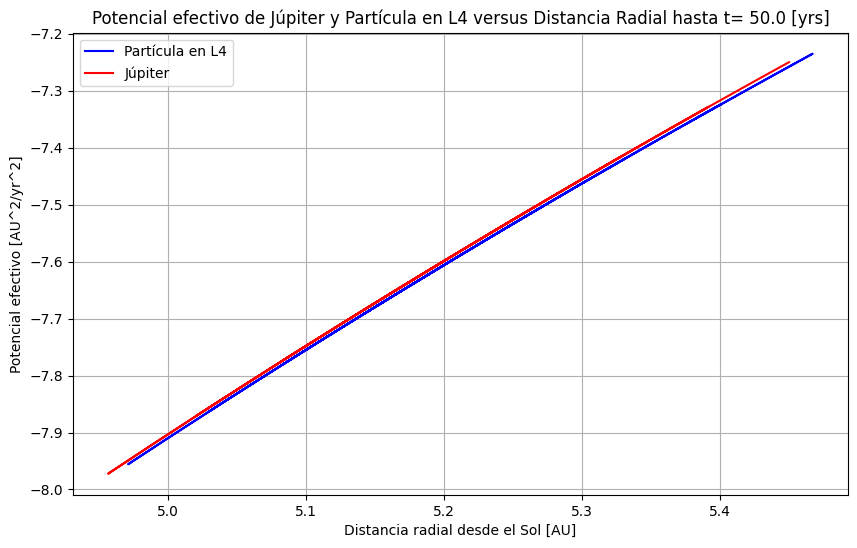

In [147]:
# Listas para guardar las distancias y los potenciales efectivos
distancias_sol_particula = []
distancias_sol_jupiter = []
potenciales_efectivos_particula = []
potenciales_efectivos_jupiter = []

# Ejecutar la simulación y calcular el potencial efectivo en cada paso
for time in times3:
    sim4.integrate(time)

    # Posiciones actuales
    sol = sim4.particles[0]
    jupiter = sim4.particles[1]
    particula = sim4.particles[2]

    # Calcular las distancias radiales desde el Sol y desde Júpiter
    r_sol_particula = np.sqrt(particula.x**2 + particula.y**2)  # Distancia al Sol (partícula)
    r_jupiter_particula = np.sqrt((particula.x - jupiter.x)**2 + (particula.y - jupiter.y)**2)  # Distancia a Júpiter (partícula)

    r_sol_jupiter = np.sqrt(jupiter.x**2 + jupiter.y**2)  # Distancia al Sol (Júpiter)

    # Calcular el potencial efectivo para la partícula
    # Momento angular de la partícula en L4/L5
    L_particula = m_particula * r_jupiter**2 * omega
    potencial_particula = calcular_potencial_efectivo(r_sol_particula, r_jupiter_particula, L_particula, m_particula, m_sun, m_jupiter)

    # Calcular el potencial efectivo para Júpiter
    L_jupiter = m_jupiter * r_sol_jupiter**2 * omega  # Momento angular de Júpiter
    potencial_jupiter = calcular_potencial_efectivo(r_sol_jupiter,r_jupiter_particula, L_jupiter, m_jupiter, m_sun, m_jupiter)  # Distancia pequeña para evitar división por cero

    # Guardar los resultados
    distancias_sol_particula.append(r_sol_particula)
    distancias_sol_jupiter.append(r_sol_jupiter)
    potenciales_efectivos_particula.append(potencial_particula)
    potenciales_efectivos_jupiter.append(potencial_jupiter)

# Graficar el potencial efectivo vs la distancia radial desde el Sol para cada cuerpo
plt.figure(figsize=(10, 6))

# Potencial de la partícula
plt.plot(distancias_sol_particula, potenciales_efectivos_particula, label=(f"Partícula en L{4 if eleccion_L4_L5 == 'L4' else 5}"), color='blue')

# Potencial de Júpiter
plt.plot(distancias_sol_jupiter, potenciales_efectivos_jupiter, label='Júpiter', color='red')

# Añadir etiquetas y detalles
plt.xlabel('Distancia radial desde el Sol [AU]')
plt.ylabel('Potencial efectivo [AU^2/yr^2]')
plt.title(f"Potencial efectivo de Júpiter y Partícula en L{4 if eleccion_L4_L5 == 'L4' else 5} versus Distancia Radial hasta t= {tiempo_final_3} [yrs]" )
plt.grid(True)
plt.legend()
plt.show()